In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Regression 

Up until this point, we’ve been working with classification models, where we try to determine what​ something is. Now we’re curious about determining a ​specific​ value based on an input. For example, you might want to use a neural network to predict what the temperature will be tomorrow or what the price of a car should be. For a task like this, we need something with a much more granular output. This also means that we require a new way to measure loss, as well as a new output layer activation function! It also means our data are different. We need training data that have target scalar values, not classes.



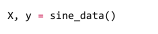
plt.plot(X, y) 
plt.show()

The data above will produce a graph like:

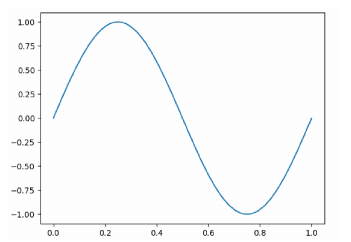

Figure 1:​ The sine data graph.

### Linear Activation 

Since we’re no longer using classification labels and want to predict a scalar value, we’re going to use a linear activation function for the output layer. This linear function does not modify its input and passes it to the output: ​y=x.​ For the backward pass, we already know the derivative of​ f(x)=x is ​1​; thus, the full class for our new linear activation function is:

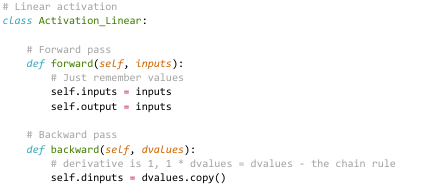

This might raise a question — why do we even write some code that does nothing? We just pass inputs to outputs for the forward pass and do the same with gradients during the backward pass since, to apply the chain rule, we multiply incoming gradients by the derivative, which is ​1.​ We do this only for completeness and clarity to see the activation function of the output layer in the model definition code. From a computational time point of view, this adds almost nothing to the processing time, at least not enough to noticeably impact training times. Now we just need to figure out loss!

### Mean Squared Error Loss 

Since we aren’t working with classification labels anymore, we cannot calculate cross-entropy. Instead, we need some new methods. The two main methods for calculating error in regression are ​mean squared error​ (MSE) and ​mean absolute error​ (MAE). With ​mean squared error​, you square the difference between the predicted and true values of single outputs (as the model can have multiple regression outputs) and average those squared values.

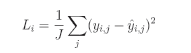

Where ​y​ means the target value, ​y-hat​ means predicted value, index ​i​ means the current sample, index ​j​ means the current output in this sample, and the ​J​ means the number of outputs. The idea here is to penalize more harshly the further away we get from the intended target.


### Mean Squared Error Loss Derivative 

The partial derivative of squared error with respect to the predicted value is:
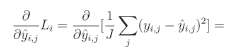

1​ divided by ​J​ (the number of outputs) is a constant and can be moved outside of the derivative. Since we are calculating the derivative with respect to the given output, ​j,​ the sum of one element equals this element:

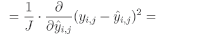

To calculate the partial derivative of an expression to the power of some value, we need to multiply this exponent by the expression, subtract 1 from the exponent, and multiply this by the partial derivative of the inner function:

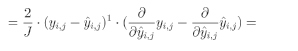


The partial derivative of the ground truth value with respect to the predicted value equals ​0​ since we treat other variables as constants. The partial derivative of the predicted value with respect to itself equals ​1​, which results in ​0-1=-1.​ This is multiplied by the rest of the equation and forms the solution:
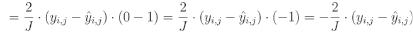

###  Solution
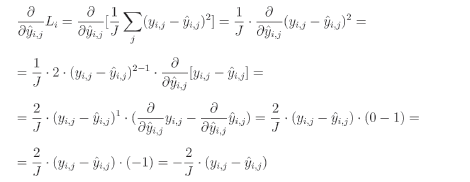

The partial derivative equals ​-2​, multiplied by the subtraction of the true and predicted values, and then divided by the number of outputs to normalize the gradients, making their magnitude invariant to the number of outputs.

### Mean Squared Error (MSE) Loss Code 

The code for MSE includes an implementation of the equation to calculate the sample loss from multiple outputs. ​axis=​ -​1​ with the mean calculation was explained in the previous chapter in detail and, in short words, it informs NumPy to calculate mean across outputs, for each sample separately. For the backward pass, we implemented the derivative equation, which results in ​-2 multiplied by the difference of true and predicted values, and normalized by the number of outputs. Similarly to the other loss function implementations, we also normalize gradients by the number of samples to make them invariant to the batch size, or the number of samples in general:

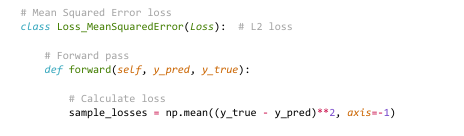

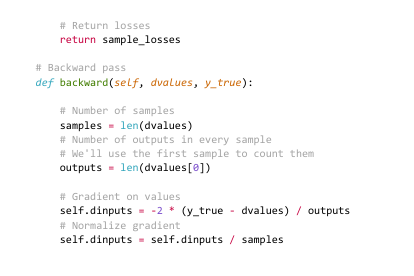

### Mean Absolute Error Loss 

With ​mean absolute error​, you take the absolute difference between the predicted and true values in a single output and average those absolute values.

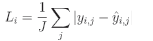

Where ​y​ means the target value, ​y-hat​ means predicted value, index ​i​ means the current sample, index ​j​ means the current output in this sample, and the ​J​ means the number of outputs. This function, used as a loss, penalizes the error linearly. It produces sparser results and is robust to outliers, which can be both advantageous and disadvantageous. In reality, L1 (MAE) loss is used less frequently than L2 (MSE) loss.

### Mean Absolute Error Loss Derivative 

The partial derivative for absolute error with respect to the predicted values is:
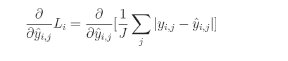
1​ divided by ​J​ (the number of outputs) is a constant, and can be moved outside of the derivative. Since we are calculating the derivative with respect to the given output, ​j,​ the sum of one element equals this element:

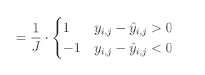

Full solution:

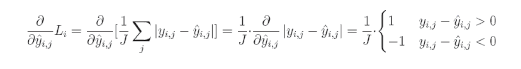

### Mean Absolute Error Loss Code 

The code for mean absolute error is very similar to the mean squared error. The forward pass includes NumPy’s ​np.abs()​ to calculate absolute values before calculating the mean. For the backward pass, we’ll use ​np.sign(),​ which returns 1 or -1 given the sign of the input and ​0​ if the parameter equals ​0,​ then normalize gradients by the number of samples to make them invariant to the batch size, or number of samples in general:

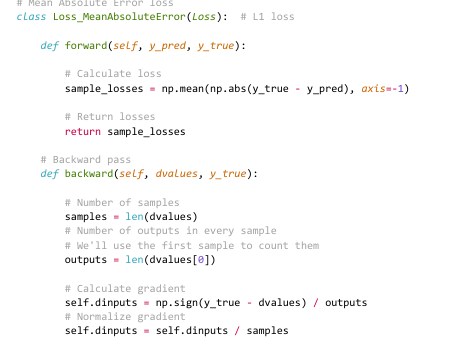



### Accuracy in Regression 

Now that we’ve got data, an activation function, and a loss calculation for regression, we’d like to measure performance. With cross-entropy, we were able to count the number of matches (situations where the prediction equals the ground truth target), and then divide it by the number of samples to measure the model’s accuracy. With a regression model, we have two problems: the first problem is that each output neuron in the model (there might be many) is a separate output ​—​ like in a binary regression model and unlike in a classifier, where all outputs contribute toward a common prediction. The second problem is that the prediction is a float value, and we can’t simply check if the output value equals the ground truth one, as it most likely won’t ​—​ if it differs even slightly, the accuracy will be a 0. For example, if your model predicts home prices and one of the samples has the target price of $192,500, and the predicted value is $192,495, then a pure “is it equal” assessment would return False. We’d likely consider the predicted price to be correct or “close enough” in this scenario, given the magnitude of the numbers in consideration. There’s no perfect way to show accuracy with regression. Still, it is preferable to have some accuracy metric. For example, Keras, a popular deep learning framework, shows both accuracy and loss for regression models, and we’ll also make our own accuracy metric. First, we need some “limit” value, which we’ll call “precision.” To calculate this precision, we’ll calculate the standard deviation from the ground truth target values and then divide it by ​250.​ This value can certainly vary depending on your goals. The larger the number you divide by, the more “strict” the accuracy metric will be. ​250​ is our value of choice. Code to represent this:

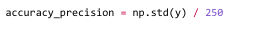

Then we could use this precision value as a sort of “cushion allowance” for regression outputs when comparing targets and predicted values for accuracy. We perform the comparison by applying the absolute value on the difference between the ground truth values and the predictions. Then we check if the difference is smaller than our previously calculated precision:
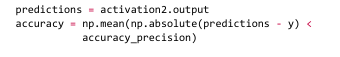

### Regression Model Training 

With this new activation function, loss, and way of calculating accuracy, we now create our model:

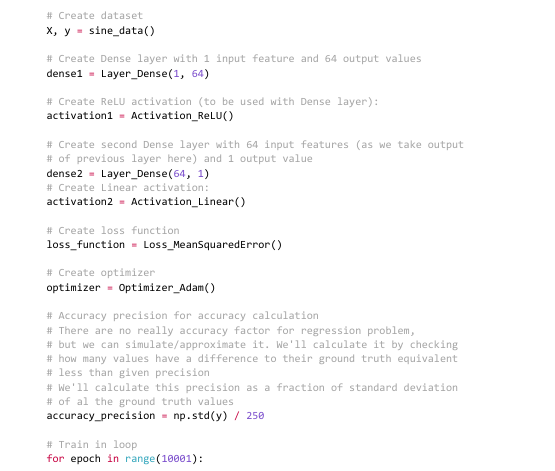

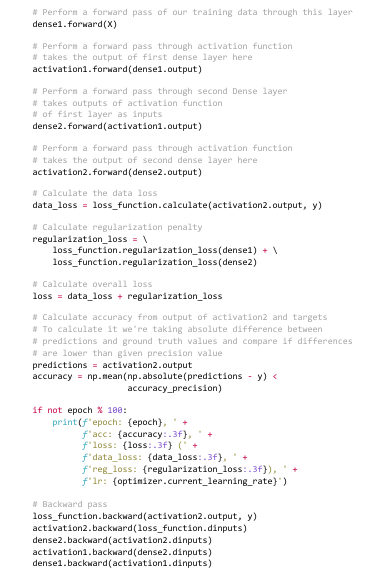

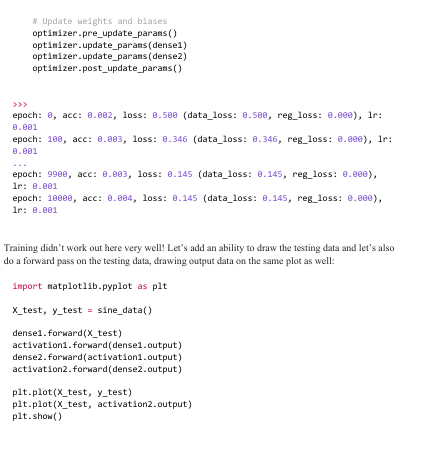

First, we are importing matplotlib, then creating a new set of data. Next, we have 4 lines of the code that are the same as the forward pass from our code above. We could call it a prediction or, in the context of what we are going to do, validation. We’ll cover both topics and explain what validation and prediction are in the future chapters. For now, it’s enough to know that what we are doing here is predicting on the same feature-set that we’ve used to train the model in order to see what the model learned and returns for our data — seeing how close outputs are to the training ground-true values. We are then plotting the training data, which are obviously a sine, and prediction data, what we’d hope to form a sine as well. Let’s run this code again and take a look at the generated image:
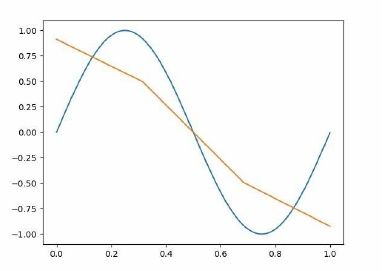

Figure 2:​ Model prediction - could not fit the sine data.
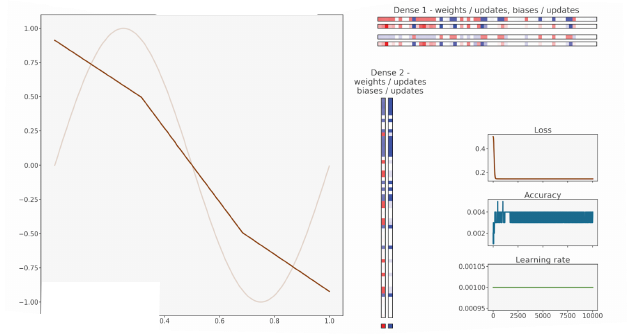

Figure 3:​ Model stoppped training immediately.
Recall the rectified linear activation function and how its nonlinear behavior allowed us to map nonlinear functions, but we also needed two or more hidden layers. In this case, we have only 1 hidden layer followed by the output layer. As we should know by now, this is simply not enough!

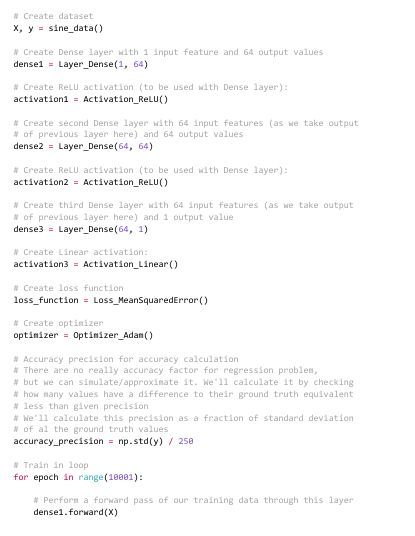
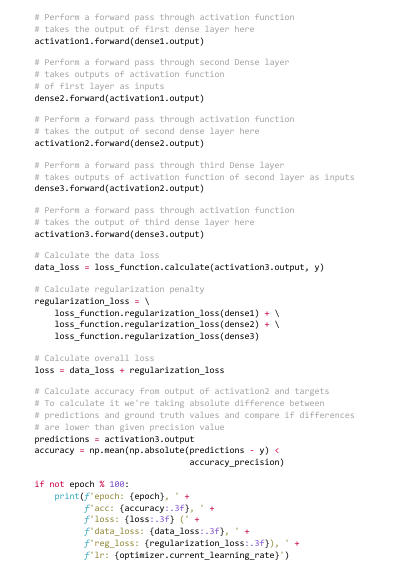


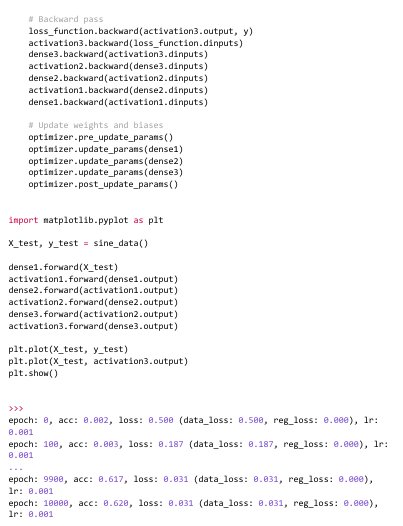

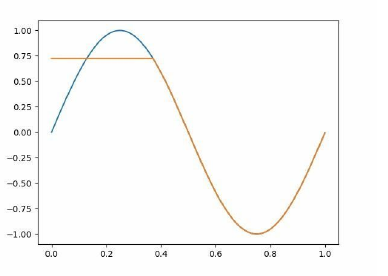.

Figure 4:​ Model prediction - better fit to the data.
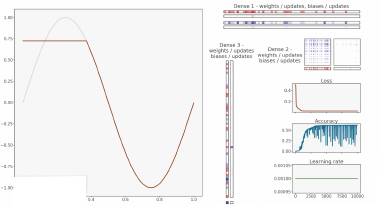

Figure 5:​ Model trained to better fit the sine data.

Our model’s accuracy is not very good, and loss seems stuck at a pretty high level for this model. The image shows us why this is the case, the model has some trouble fitting our data, and it looks like it might be stuck in a local minimum. As we have already learned, to try to help the model with being stuck at a local minimum, we might use a higher learning rate and add a learning rate decay. In the previous model, we have used the default learning rate, which is ​0.001​. Let’s set it to ​0.01​ and add learning rate decaying:

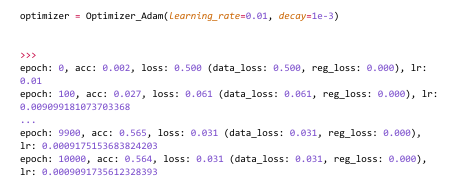

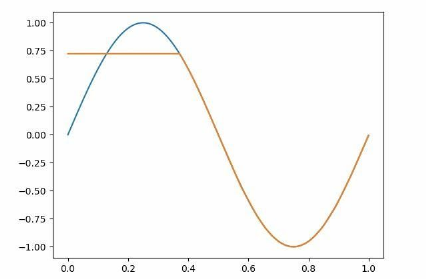

Figure 16:​ Model prediction - similar fit to the data.

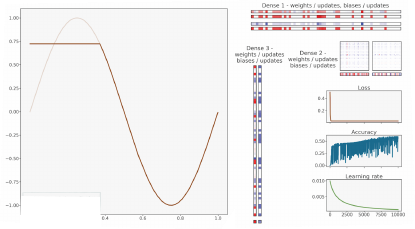
Figure 17:​ Model trained to fit the sine data, similar fit.
Our model seems to still be stuck with even lower accuracy this time. Let’s try to use an even bigger learning rate then:

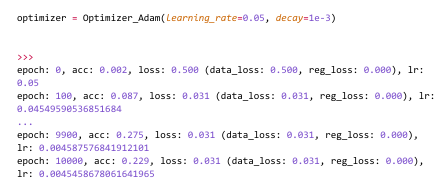

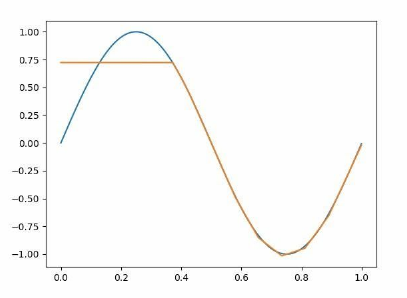

Figure 18:​ Model prediction - similar fit to the data.

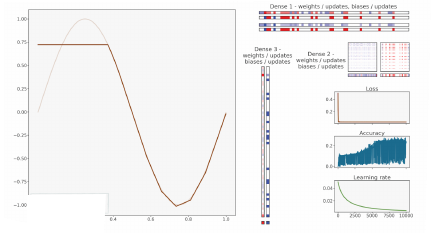
Figure 19:​ Model trained to fit the sine data, similar fit.

It’s getting even worse. Accuracy drops significantly, and we can observe the lower part of the sine being of a worse shape as well. It seems like we are not able to make this model learn the data, but after multiple tests and tuning hyperparameters, we could find a learning rate of 0.005:

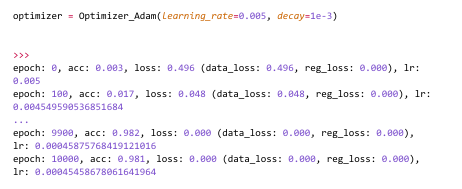

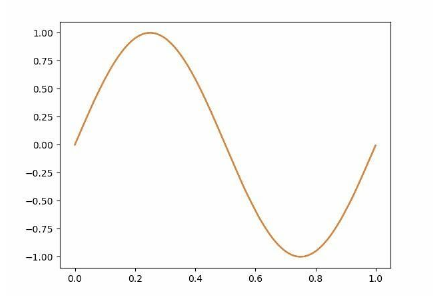
Figure 10:​ Model prediction - good fit to the data.

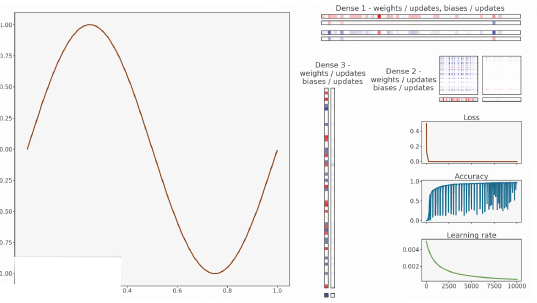
Figure 11:​ Model trained to fit the sine data.

This time model has learned pretty well, but the curious part is that both lower and higher learning rates than what we used here initially caused accuracy to be pretty low and loss be stuck at the same value when the learning rate in between them actually worked. Debugging such a problem is usually a pretty hard task and out of the scope of this book. The accuracy and loss suggest that updates to the parameters are not big enough, but the rising learning rate makes things only worse, and there is just this single spot that we were able to find that lets our model learn. You might recall that, back in chapter 3, we were discussing parameter initialization methods and why it’s important to initialize them wisely. It turns out that, in the current case, we can help the model learn by changing the factor of 0.01 to 0.1 in the Dense layer’s weight initialization. But then you might ask — since the learning rate is being used to decide how much of a gradient to apply to the parameters, why does changing these initial values help instead? As you may recall, the back-propagated gradient is calculated using weights, and the learning rate does not affect it. That’s why it’s important to use right weight initialization, and so far, we have been using the same values for each model. If we, for example, take a look at the source code of Keras, a neural network framework, we can learn that:
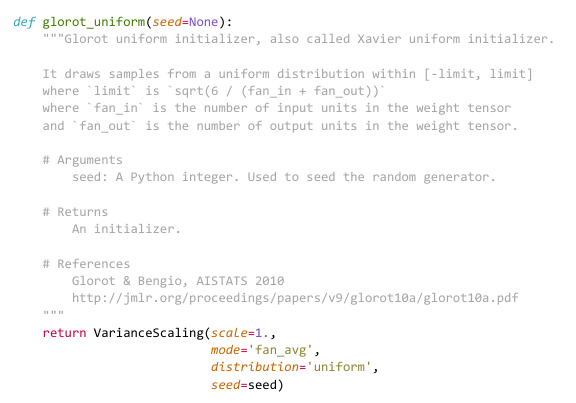

This code is part of the Keras 2 library. The important part of the above is actually the comment section, which describes how it initializes weights. We can find there are important pieces of information to remember — the fraction that multiplies the draw from the uniform distribution depends on the number of inputs and the number of neurons and is not constant like in our case. This method of initialization is called ​Glorot uniform​. We (the authors of this book) actually have had a very similar problem in one of our projects, and changing the way weights were initialized changed the model from not learning at all to a learning state. For the purposes of this model, let’s change the factor multiplying the draw from the normal distribution in the weight initialization of the ​Dense​ layer to 0.1 and re-run all four of the above attempts to compare results:

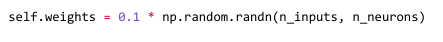
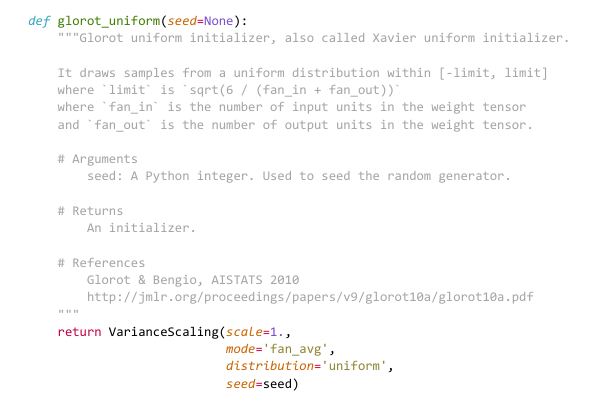

This code is part of the Keras 2 library. The important part of the above is actually the comment section, which describes how it initializes weights. We can find there are important pieces of information to remember — the fraction that multiplies the draw from the uniform distribution depends on the number of inputs and the number of neurons and is not constant like in our case. This method of initialization is called ​Glorot uniform​. We (the authors of this book) actually have had a very similar problem in one of our projects, and changing the way weights were initialized changed the model from not learning at all to a learning state. For the purposes of this model, let’s change the factor multiplying the draw from the normal distribution in the weight initialization of the ​Dense​ layer to 0.1 and re-run all four of the above attempts to compare results:
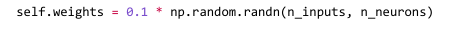

And all above tests re-ran:

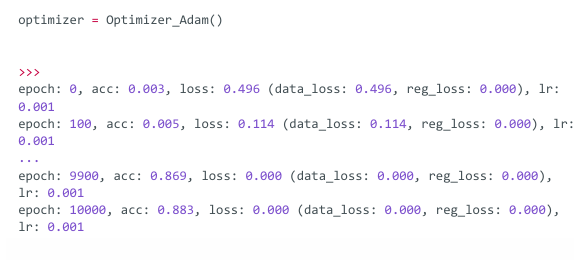

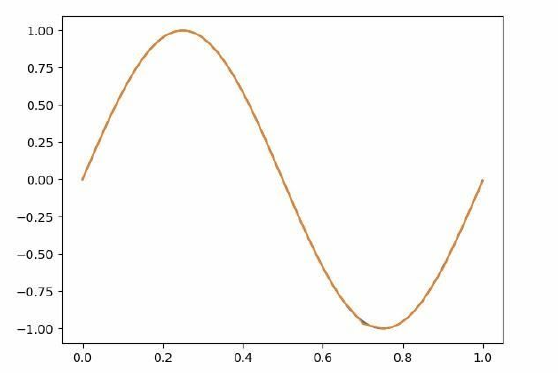
Figure 12:​ Model prediction - good fit to the data with different weight initialization.

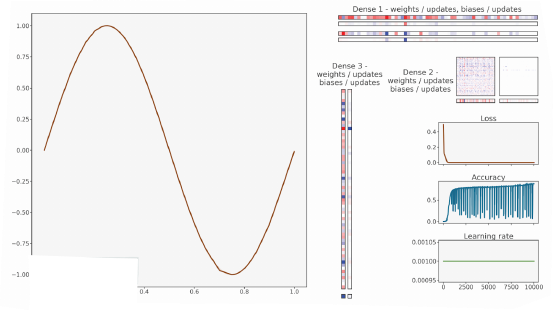

Figure 13:​ Model trained to fit the sine data after replacing weight initialization.
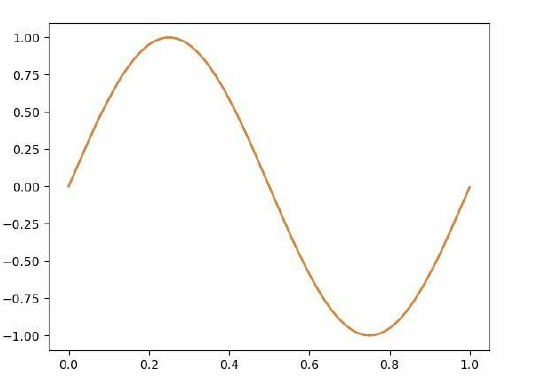

Figure 14:​ Model prediction - good fit to the data with different weight initialization.

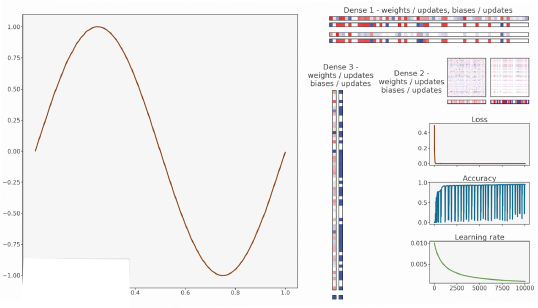
Figure 15:​ Model trained to fit the sine data after replacing weight initialization.

Another previously stuck model has trained very well this time, achieving very good accuracy.

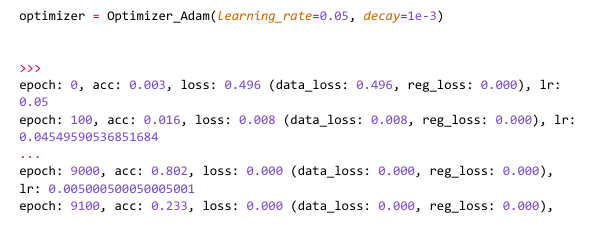

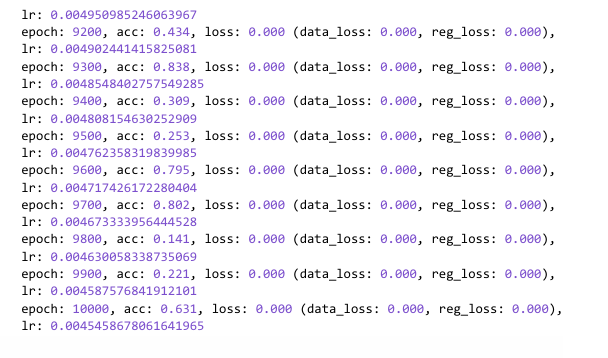

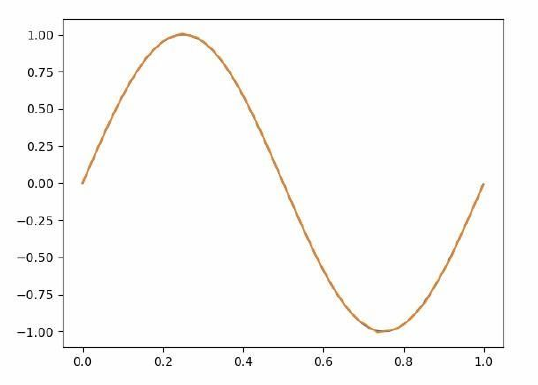

Figure 16:​ Model prediction - good fit to the data with different weight initialization.

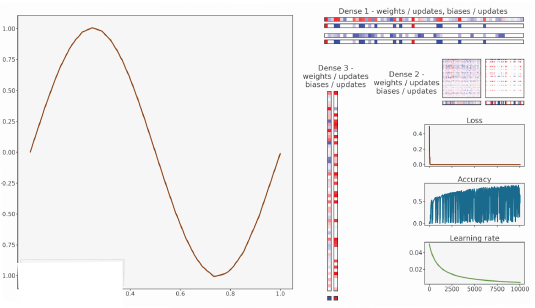

Figure 17:​ Model trained to fit the sine data after replacing weight initialization.

The “jumping” accuracy in the case of this set of the optimizer settings shows that the learning rate is way too big, but even then, the model learned the shape of the sine function considerably well.

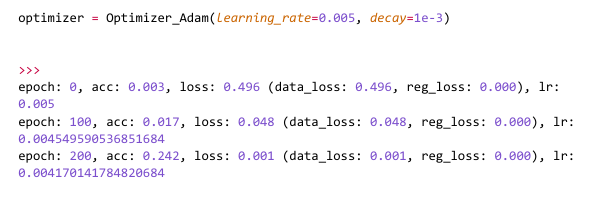

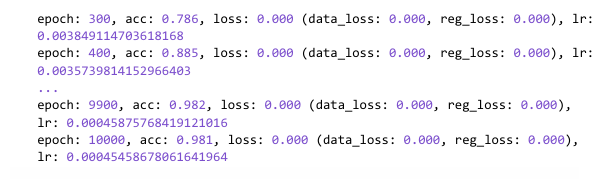

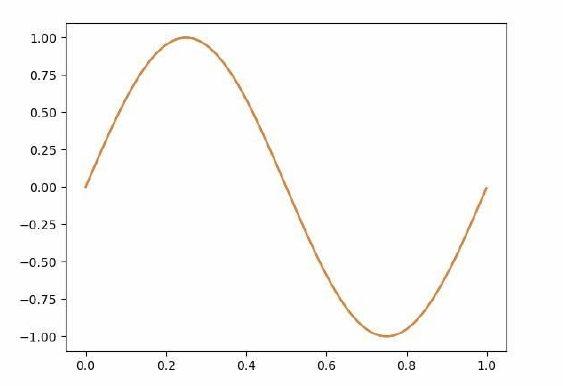

Figure 18:​ Model prediction - best fit to the data with different weight initialization.

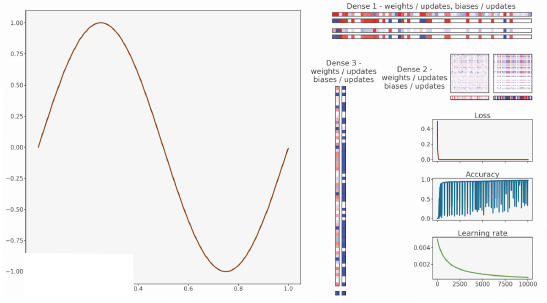


Figure 19:​ Model trained to best fit the sine data after replacing weight initialization.

These hyperparameters yielded the best results again, but not by much. As we can see, this time, our model learned in all cases, using different learning rates, and did not get stuck if any of them. That’s how much changing weight initialization can impact the training process.




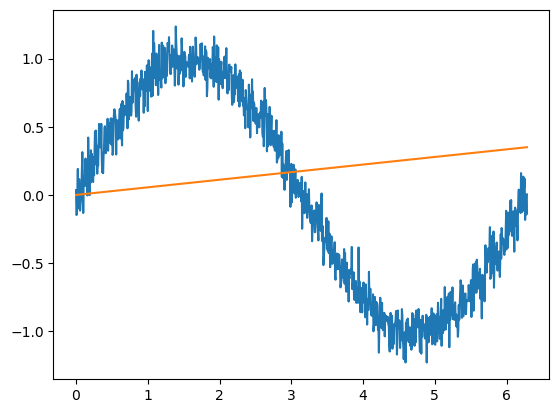

In [9]:
import numpy as np

# Function to create spiral data (similar to nnfs)
def spiral_data(samples, classes):
    X = np.zeros((samples * classes, 2))  # Input features
    y = np.zeros(samples * classes, dtype='uint8')  # Class labels
    for class_number in range(classes):
        ix = range(samples * class_number, samples * (class_number + 1))
        r = np.linspace(0.0, 1, samples)  # Radius
        t = np.linspace(class_number * 4, (class_number + 1) * 4, samples) + np.random.randn(samples) * 0.2  # Theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = class_number
    return X, y
import numpy as np

def sine_data(samples=1000, noise=0.1):
    """
    Generate a dataset based on a sine wave with added Gaussian noise.

    Parameters:
    - samples: int, the number of data points to generate (default 1000)
    - noise: float, standard deviation of the Gaussian noise to add (default 0.1)

    Returns:
    - X: np.ndarray, input feature array of shape (samples, 1)
    - y: np.ndarray, output labels array of shape (samples,)
    """
    X = np.linspace(0, 2 * np.pi, samples)  # Input values, evenly spaced over one sine wave period
    y = np.sin(X) + np.random.normal(0, noise, samples)  # Sine wave with added Gaussian noise
    
    X = X.reshape(-1, 1)  # Reshaping X to have a shape of (samples, 1)
    
    return X, y


# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0, weight_regularizer_l2=0,
                 bias_regularizer_l1=0, bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)


        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * \
                             self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * \
                            self.biases

        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# Dropout
class Layer_Dropout:

    # Init
    def __init__(self, rate):
        # Store rate, we invert it as for example for dropout
        # of 0.1 we need success rate of 0.9
        self.rate = 1 - rate

    # Forward pass
    def forward(self, inputs):
        # Save input values
        self.inputs = inputs
        # Generate and save scaled mask
        self.binary_mask = np.random.binomial(1, self.rate,
                           size=inputs.shape) / self.rate
        # Apply mask to output values
        self.output = inputs * self.binary_mask

    # Backward pass
    def backward(self, dvalues):
        # Gradient on values
        self.dinputs = dvalues * self.binary_mask

# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)

            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)


# Sigmoid activation
class Activation_Sigmoid:

    # Forward pass
    def forward(self, inputs):
        # Save input and calculate/save output
        # of the sigmoid function
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    # Backward pass
    def backward(self, dvalues):
        # Derivative - calculates from output of the sigmoid function
        self.dinputs = dvalues * (1 - self.output) * self.output


# Linear activation
class Activation_Linear:

    # Forward pass
    def forward(self, inputs):
        # Just remember values
        self.inputs = inputs
        self.output = inputs

    # Backward pass
    def backward(self, dvalues):
        # derivative is 1, 1 * dvalues = dvalues - the chain rule
        self.dinputs = dvalues.copy()


# SGD optimizer
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If we use momentum
        if self.momentum:

            # If layer does not contain momentum arrays, create them
            # filled with zeros
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                # If there is no momentum array for weights
                # The array doesn't exist for biases yet either.
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with
            # current gradients
            weight_updates = \
                self.momentum * layer.weight_momentums - \
                self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            # Build bias updates
            bias_updates = \
                self.momentum * layer.bias_momentums - \
                self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # Vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * \
                             layer.dweights
            bias_updates = -self.current_learning_rate * \
                           layer.dbiases

        # Update weights and biases using either
        # vanilla or momentum updates
        layer.weights += weight_updates
        layer.biases += bias_updates
    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Adagrad optimizer
class Optimizer_Adagrad:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

# RMSprop optimizer
class Optimizer_RMSprop:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + \
            (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + \
            (1 - self.rho) * layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Adam optimizer
class Optimizer_Adam:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum  with current gradients
        layer.weight_momentums = self.beta_1 * \
                                 layer.weight_momentums + \
                                 (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * \
                               layer.bias_momentums + \
                               (1 - self.beta_1) * layer.dbiases
        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + \
            (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + \
            (1 - self.beta_2) * layer.dbiases**2
        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         weight_momentums_corrected / \
                         (np.sqrt(weight_cache_corrected) +
                             self.epsilon)
        layer.biases += -self.current_learning_rate * \
                         bias_momentums_corrected / \
                         (np.sqrt(bias_cache_corrected) +
                             self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Common loss class
class Loss:

    # Regularization loss calculation
    def regularization_loss(self, layer):

        # 0 by default
        regularization_loss = 0

        # L1 regularization - weights
        # calculate only when factor greater than 0
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * \
                                   np.sum(np.abs(layer.weights))

        # L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * \
                                   np.sum(layer.weights * \
                                          layer.weights)


        # L1 regularization - biases
        # calculate only when factor greater than 0
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * \
                                   np.sum(np.abs(layer.biases))

        # L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * \
                                   np.sum(layer.biases * \
                                          layer.biases)

        return regularization_loss

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Binary cross-entropy loss
class Loss_BinaryCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Calculate sample-wise loss
        sample_losses = -(y_true * np.log(y_pred_clipped) +
                          (1 - y_true) * np.log(1 - y_pred_clipped))
        sample_losses = np.mean(sample_losses, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)

        # Calculate gradient
        self.dinputs = -(y_true / clipped_dvalues -
                         (1 - y_true) / (1 - clipped_dvalues)) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Mean Squared Error loss
class Loss_MeanSquaredError(Loss):  # L2 loss

    # Forward pass
    def forward(self, y_pred, y_true):

        # Calculate loss
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Mean Absolute Error loss
class Loss_MeanAbsoluteError(Loss):  # L1 loss

    # Forward pass
    def forward(self, y_pred, y_true):

        # Calculate loss
        sample_losses = np.mean(np.abs(y_true - y_pred), axis=-1)

        # Return losses
        return sample_losses


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Calculate gradient
        self.dinputs = np.sign(y_true - dvalues) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples

#X, y = sine_data(samples=1000, noise=0.1)

# Initialize the dense layer
#dense1 = Layer_Dense(n_inputs=1, n_neurons=64)
# Create dataset
#X, y = sine_data()
X, y = spiral_data(samples=100, classes=2)
# Create Dense layer with 1 input feature and 64 output values
dense1 = Layer_Dense(1, 64)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 64 output values
dense2 = Layer_Dense(64, 64)

# Create ReLU activation (to be used with Dense layer):
activation2 = Activation_ReLU()

# Create third Dense layer with 64 input features (as we take output
# of previous layer here) and 1 output value
dense3 = Layer_Dense(64, 1)

# Create Linear activation:
activation3 = Activation_Linear()

# Create loss function
loss_function = Loss_MeanSquaredError()

# Create optimizer
optimizer = Optimizer_Adam(learning_rate=0.005, decay=1e-3)


# Accuracy precision for accuracy calculation
# There are no really accuracy factor for regression problem,
# but we can simulate/approximate it. We'll calculate it by checking
# how many values have a difference to their ground truth equivalent
# less than given precision
# We'll calculate this precision as a fraction of standard deviation
# of all the ground truth values
accuracy_precision = np.std(y) / 250

# Train in loop
for epoch in range(10001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function
    # of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through activation function
    # takes the output of second dense layer here
    activation2.forward(dense2.output)

    # Perform a forward pass through third Dense layer
    # takes outputs of activation function of second layer as inputs
    dense3.forward(activation2.output)

    # Perform a forward pass through activation function
    # takes the output of third dense layer here
    activation3.forward(dense3.output)

    # Calculate the data loss
    data_loss = loss_function.calculate(activation3.output, y)

    # Calculate regularization penalty
    regularization_loss = \
        loss_function.regularization_loss(dense1) + \
        loss_function.regularization_loss(dense2) + \
        loss_function.regularization_loss(dense3)

    # Calculate overall loss
    loss = data_loss + regularization_loss

    # Calculate accuracy from output of activation2 and targets
    # To calculate it we're taking absolute difference between
    # predictions and ground truth values and compare if differences
    # are lower than given precision value
    predictions = activation3.output
    accuracy = np.mean(np.absolute(predictions - y) <
                       accuracy_precision)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f} (' +
              f'data_loss: {data_loss:.3f}, ' +
              f'reg_loss: {regularization_loss:.3f}), ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_function.backward(activation3.output, y)
    activation3.backward(loss_function.dinputs)
    dense3.backward(activation3.dinputs)
    activation2.backward(dense3.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_params()


import matplotlib.pyplot as plt

X_test, y_test = sine_data()

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
dense3.forward(activation2.output)
activation3.forward(dense3.output)

plt.plot(X_test, y_test)
plt.plot(X_test, activation3.output)
plt.show()


In [3]:
import numpy as np

# Define a Dense layer class
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        """
        Initializes a fully connected layer.
        
        Parameters:
        - n_inputs: number of input features
        - n_neurons: number of neurons in the layer
        """
        # Initialize weights with shape (n_inputs, n_neurons)
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        # Initialize biases with shape (1, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        """
        Performs a forward pass through the layer.
        
        Parameters:
        - inputs: input data of shape (samples, n_inputs)
        """
        # Compute the output of the layer as input * weights + biases
        self.output = np.dot(inputs, self.weights) + self.biases

# Generate sine wave data
def sine_data(samples=1000, noise=0.1):
    """
    Generate a sine wave dataset with noise.
    
    Parameters:
    - samples: number of data points to generate
    - noise: standard deviation of Gaussian noise to add
    
    Returns:
    - X: input feature array of shape (samples, 1)
    - y: output labels array of shape (samples,)
    """
    X = np.linspace(0, 2 * np.pi, samples)
    y = np.sin(X) + np.random.normal(0, noise, samples)
    X = X.reshape(-1, 1)  # Reshape to (samples, 1)
    return X, y

# Generate data
X, y = sine_data(samples=1000, noise=0.1)

# Initialize the dense layer
dense1 = Layer_Dense(n_inputs=1, n_neurons=64)  # n_inputs = 1 because X has 1 feature

# Perform forward pass
dense1.forward(X)

# Output the result
print("Output shape:", dense1.output.shape)


Output shape: (1000, 64)


In [6]:
import numpy as np

# Function to generate sine wave data
def sine_data(samples=1000):
    X = np.linspace(0, 2 * np.pi, samples).reshape(-1, 1)  # Shape (1000, 1)
    y = np.sin(X).reshape(-1, 1)  # Shape (1000, 1)
    return X, y

# Dense layer class
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        # Save input values and calculate output values
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        # Gradient on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

# ReLU activation class
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

# Softmax activation class
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    def backward(self, dvalues):
        self.dinputs = dvalues

# Categorical Crossentropy Loss class
class Loss_CategoricalCrossentropy:
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        
        negative_log_likelihoods = -np.log(correct_confidences)
        return np.mean(negative_log_likelihoods)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])

        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

# Combined Softmax Activation and Cross-Entropy Loss for backpropagation
class Activation_Softmax_Loss_CategoricalCrossentropy:
    def forward(self, inputs, y_true):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.forward(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)

        if len(y_true.shape) == 1:
            y_true = np.eye(dvalues.shape[1])[y_true]

        self.dinputs = (dvalues - y_true) / samples

# Generate the sine wave dataset
X, y = sine_data()

# Instantiate the layers
dense1 = Layer_Dense(1, 64)  # Input: 1 feature, Output: 64 neurons
activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 64)  # Input: 64 neurons, Output: 64 neurons
activation2 = Activation_ReLU()

dense3 = Layer_Dense(64, 1)   # Input: 64 neurons, Output: 1 neuron (for regression)
activation3 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

# Forward pass
dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

dense3.forward(activation2.output)
activation3.forward(dense3.output)

# Calculate loss
loss = loss_function.forward(activation3.output, y)
print('Loss:', loss)

# Backward pass
loss_function.backward(activation3.output, y)
activation3.backward(loss_function.dinputs)

dense3.backward(activation3.dinputs)
activation2.backward(dense3.dinputs)

dense2.backward(activation2.dinputs)
activation1.backward(dense2.dinputs)

dense1.backward(activation1.dinputs)

# Print gradients for debugging
print("Gradients:")
print("Dense1 Weights Gradient:", dense1.dweights)
print("Dense2 Weights Gradient:", dense2.dweights)
print("Dense3 Weights Gradient:", dense3.dweights)


Loss: nan
Gradients:
Dense1 Weights Gradient: [[ 1.09356075e-03 -9.89606654e-04 -1.72402442e-04  5.34494779e-05
   0.00000000e+00  0.00000000e+00 -5.51968818e-04  0.00000000e+00
   0.00000000e+00 -4.08393446e-04  0.00000000e+00  0.00000000e+00
  -1.29032505e-05  8.62849986e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.74806683e-04  0.00000000e+00  0.00000000e+00
   7.15406428e-04 -7.46342092e-05  1.19274265e-03  2.30793963e-05
   0.00000000e+00  0.00000000e+00 -7.99736443e-04  0.00000000e+00
   0.00000000e+00 -9.52466999e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.34853375e-04  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  4.76504876e-04
   9.73874312e-04 -2.18001797e-04  6.16490161e-04  9.89347005e-04
   0.00000000e+00  8.06389755e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.59702920e-04  0.00000000e+00
   0.00000000e+00  2.49203761e-05  0.00000000e+00  2.74071206e-04
   0.00000000e+00  5.93499612e

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in log


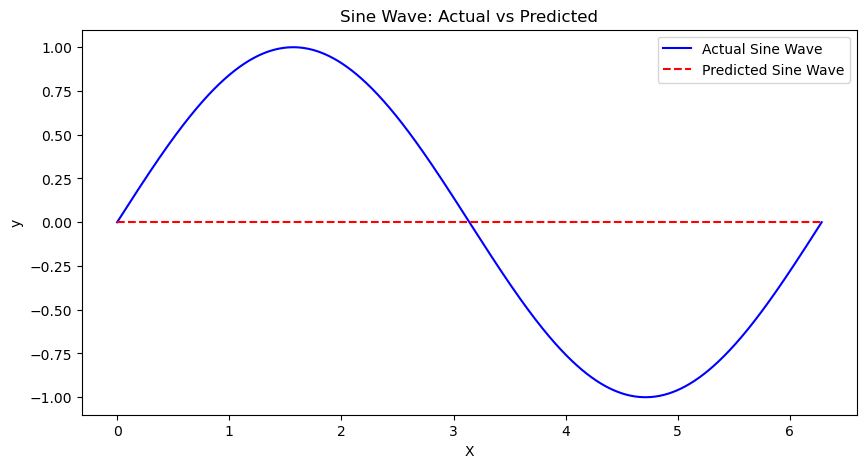

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate sine wave data
def sine_data(samples=1000):
    X = np.linspace(0, 2 * np.pi, samples).reshape(-1, 1)  # Shape (1000, 1)
    y = np.sin(X).reshape(-1, 1)  # Shape (1000, 1)
    return X, y

# Dense layer class
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        # Save input values and calculate output values
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        # Gradient on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

# ReLU activation class
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

# Softmax activation class
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    def backward(self, dvalues):
        self.dinputs = dvalues

# Categorical Crossentropy Loss class
class Loss_CategoricalCrossentropy:
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        
        negative_log_likelihoods = -np.log(correct_confidences)
        return np.mean(negative_log_likelihoods)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])

        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

# Combined Softmax Activation and Cross-Entropy Loss for backpropagation
class Activation_Softmax_Loss_CategoricalCrossentropy:
    def forward(self, inputs, y_true):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.forward(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)

        if len(y_true.shape) == 1:
            y_true = np.eye(dvalues.shape[1])[y_true]

        self.dinputs = (dvalues - y_true) / samples

# Generate the sine wave dataset
X, y = sine_data()

# Instantiate the layers
dense1 = Layer_Dense(1, 64)  # Input: 1 feature, Output: 64 neurons
activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 64)  # Input: 64 neurons, Output: 64 neurons
activation2 = Activation_ReLU()

dense3 = Layer_Dense(64, 1)   # Input: 64 neurons, Output: 1 neuron (for regression)

# Forward pass
dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

dense3.forward(activation2.output)

# Predictions from the model
y_pred = dense3.output

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='Actual Sine Wave', color='blue')
plt.plot(X, y_pred, label='Predicted Sine Wave', color='red', linestyle='--')
plt.title('Sine Wave: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
